In [173]:
import pandas as pd

df = pd.read_csv('./altura_peso.csv')
df.head()

,altura,peso
0,1.68,87.09
1,1.67,56.25
2,1.85,109.30
3,1.71,79.02
4,1.55,74.70


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   altura  30 non-null     float64
 1   peso    30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [175]:
df.describe()

,altura,peso
count,30.000000,30.000000
mean,1.654333,76.697333
std,0.110194,21.960490
min,1.460000,35.900000
25%,1.582500,73.432500
50%,1.700000,79.305000
75%,1.717500,86.647500
max,1.850000,110.000000


<Axes: xlabel='altura', ylabel='peso'>

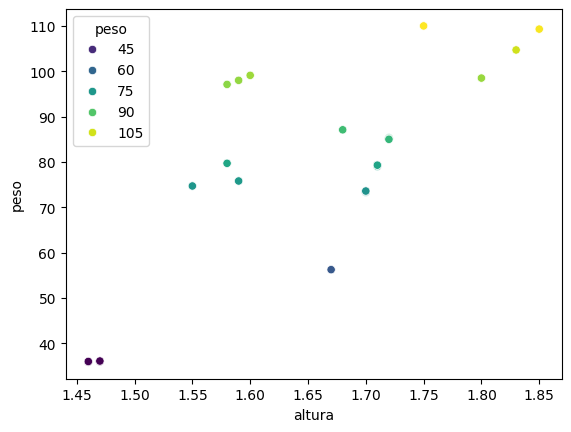

In [176]:
import seaborn as sb

sb.scatterplot(data=df, x='altura', y='peso', hue = 'peso', palette='viridis')

In [177]:
#prerar los datos para el entrenamiento 
X = df['altura']
y = df['peso']

In [178]:
y

0      87.09
1      56.25
2     109.30
3      79.02
4      74.70
5      35.90
6      97.10
7      79.32
8      73.32
9      85.32
10     36.00
11    104.70
12     79.31
13     73.41
14     85.21
15     36.00
16     79.30
17     73.50
18     85.10
19    110.00
20     79.70
21     36.00
22     99.10
23     79.29
24     73.59
25     84.99
26     75.80
27     36.10
28     98.50
29     98.00
Name: peso, dtype: float64

In [179]:
#Transformar los datos en un array de numpy

X_procesada = X.values.reshape(-1,1)
y_procesada = y.values.reshape(-1,1)

In [180]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [181]:
modelo.fit(X_procesada, y_procesada)

LinearRegression()

In [182]:
altura = 1.68
prediccion_peso = modelo.predict([[altura]])
print(f"La prediccion del peso para una altura de {altura} es: {prediccion_peso}")

La prediccion del peso para una altura de 1.68 es: [[80.64852765]]


In [183]:
altura_nueva = 1.41
prediccion_peso = modelo.predict([[altura_nueva]])
print(f"La prediccion del peso para una altura de {altura_nueva} es: {prediccion_peso}")

La prediccion del peso para una altura de 1.41 es: [[39.08401596]]


In [184]:
modelo.score(X_procesada, y_procesada)

0.596687628327403

In [185]:
print(f"Peso: {modelo.coef_}")
print(f"Sesgo (Bias): {modelo.intercept_}")

Peso: [[153.94263591]]
Sesgo (Bias): [-177.97510067]


In [186]:
#Analisis de los resultados

#************¿Funciona bien o no?*********************
# El modelo consiguió un score de 0.5966, lo cual indica que el modelo tiene apoximadamente un 60% de precision en la predicción del peso a partir de la altura, por lo que se puede decir que el modelo funciona moderadamente bien, pero no de una manera precisa y exacta.
#En algunos casos si realiza predicciones con cierta precisión, pero en otros casos no, por lo que se puede observar que el modelo no es muy confiable.

#************¿Por qué es así?**************************
#El modelo de regresión lineal es un modelo muy simple, que asume que la relación entre las variables es lineal, lo cual no es cierto en la mayoría de los casoss. 
# Este caso es un ejemplo de ello ya que el peso de una persona puede depender de otros factores como la edad, el género, la contextura física, entre otros, por lo que al usar solo la altura, el modelo pierde informacion importante que puede afectar la precisión de las predicciones.
#En el .csv hay varias personas con la misma altura pero con diferentes pesos, por lo que el modelo se topa con una variabilidad que solo con la altura no puede explicarse de manera precisa para el modelo.
#También analizando el gráfico del inicio se pudo apreciar que hay cierta dispersión en los datos, y eso dificulta el ajuste lineal que hace la regresión. Por eso el coeficiente del peso es de 153.94, lo cual indica que por cada unidad de altura, el peso aumenta en 153.94, lo cual no es muy preciso. Al igual que el sesgo que es de -177.98 lo cual indica que si la altura es 0, el peso es de -177.98, lo cual no tiene sentido en la vida real, pero solo es un dato para el ajuste lineal que hace el modelo.

REENTRENAMIENTO DEL MODELO AGREGANDO LA CARACTERISTICA DE LA EDAD A LOS DATOS

In [187]:
df2 = pd.read_csv('./altura_peso_edad.csv')
df2.head()

,altura,peso,edad
0,1.68,87.09,53
1,1.67,56.25,23
2,1.85,109.30,56
3,1.71,79.02,39
4,1.55,74.70,22


In [188]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   altura  30 non-null     float64
 1   peso    30 non-null     float64
 2   edad    30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


,altura,peso,edad
count,30.000000,30.000000,30.000000
mean,1.654333,76.697333,47.266667
std,0.110194,21.960490,17.506518
min,1.460000,35.900000,9.000000
25%,1.582500,73.432500,42.500000
50%,1.700000,79.305000,56.000000
75%,1.717500,86.647500,57.750000
max,1.850000,110.000000,60.000000


<Axes: xlabel='edad', ylabel='peso'>

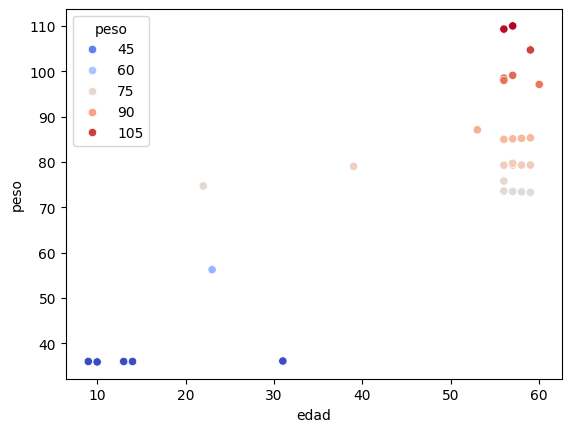

In [189]:
sb.scatterplot(data=df2, x='edad', y='peso', hue = 'peso', palette='coolwarm')

In [190]:
X = df2[['altura', 'edad']]
y = df2['peso']

In [191]:
X_procesada = X.values.reshape(-1,2)
y_procesada = y.values.reshape(-1,1)

In [192]:
modelo.fit(X_procesada, y_procesada)

LinearRegression()

In [197]:
altura = 1.67
edad = 23
prediccion_peso = modelo.predict([[altura,edad]])
print(f"La prediccion del peso para una altura de {altura} y edad {edad} es: {prediccion_peso}")

La prediccion del peso para una altura de 1.67 es: [[60.69510753]]


In [203]:
altura_nueva = 1.50
edad_nueva = 25
prediccion_peso = modelo.predict([[altura_nueva,edad_nueva]])
print(f"La prediccion del peso para una altura de {altura_nueva} y edad {edad_nueva} es: {prediccion_peso}")

La prediccion del peso para una altura de 1.5 y edad 25 es: [[50.06473677]]


In [204]:
modelo.score(X_procesada, y_procesada)

0.7387537854414963

In [205]:
print(f"Peso: {modelo.coef_}")
print(f"Sesgo (Bias): {modelo.intercept_}")

Peso: [[70.8275807   0.70515898]]
Sesgo (Bias): [-73.80560876]


In [ ]:
#Analisis de los resultados

#************¿Funciona mejor el modelo?*********************
#El modelo mejora al incluir la edad, pero aún hay espacio para mejorar. El modelo consiguió un score de 0.738, lo cual indica que el modelo tiene aproximadamente un 74% de precisión en la predicción del peso a partir de la altura y la edad, por lo que se puede decir que funciona mejor que el anterior, pero aún no es muy preciso.

#**************¿Por qué cree que es así?********************
#El modelo mejora al incluir la edad, ya que la edad es un factor que influye en el peso de una persona, por lo que al incluirlo, el modelo tiene más información para hacer las predicciones, lo cual mejora su precisión.
